# Projeto 3

## Eduardo Ferrari Magalhães, Jean Luca Walper

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#necessario para plots em 3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

# Para geração das estatisticas
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels as sm1
from scipy import stats

## Tratameto de Dados

#### Tratamento de dados geral

In [2]:
Religions = pd.read_csv('Religions.csv', sep=';')
Work = pd.read_csv('Emprego.csv', sep=';')
Literacy = pd.read_csv('Alfabetismo.csv', encoding='latin1', sep=';')
War = pd.read_csv('WarDeaths.csv', sep=';')
PIB = pd.read_csv('PIBCapta.csv', encoding='latin1', sep=';')

Work = Work.drop('Arroz', 1)

In [3]:
Religions.head(5)

,CaseID$,YEAR,COWCODE,ARDACODE,ISO3,NUMISO,COUNTRY,CHRSPROT,CHRSCAT,CHRSORTH,...,OTGENPCT,SUMPCT,TOTAL,DUALREL,DATATYPE,SRELIAB,RRELIAB,RELIAB,SOURCECD,VERSION
0,1,1945,2,234,USA,840.0,United States of America,66069671,38716742,1121898,...,39,9961,1,0,34,2,10,2,13,11
1,2,1950,2,234,USA,840.0,United States of America,73090083,42635882,3045420,...,41,9959,1,0,34,6,28,1,18,11
2,3,1955,2,234,USA,840.0,United States of America,79294628,46402368,3454916,...,193,9807,1,0,134,5,10,2,15,11
3,4,1960,2,234,USA,840.0,United States of America,90692928,50587880,3334535,...,76,9924,1,0,134,2,10,2,13,11
4,5,1965,2,234,USA,840.0,United States of America,94165803,64761783,4792868,...,3,997,1,0,134,8,28,1,20,11


In [4]:
Work.head(5)

,Total above 15 employment to population (%),1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,56.700001,56.500000,56.599998,56.200001,56.200001,56.099998,56.200001,56.200001,56.099998,56.099998,56.500000,56.400002,54.400002,56.000000,54.000000,56.000000,55.700001
1,Albania,52.700001,52.299999,52.400002,52.700001,52.799999,52.599998,52.400002,52.099998,52.099998,51.900002,51.799999,51.799999,51.799999,51.700001,51.500000,51.400002,51.400002
2,Algeria,39.400002,38.900002,39.400002,39.400002,38.099998,38.900002,39.700001,39.500000,39.400002,38.599998,40.400002,41.500000,42.799999,46.400002,48.000000,50.000000,50.500000
3,Angola,75.800003,75.800003,75.500000,75.900002,75.800003,75.900002,75.699997,75.599998,75.599998,75.500000,75.500000,75.599998,75.500000,75.500000,75.599998,75.500000,75.699997
4,Argentina,53.599998,53.799999,53.700001,53.799999,53.500000,54.400002,54.900002,55.000000,54.900002,55.500000,55.599998,55.400002,57.299999,57.700001,58.099998,58.400002,58.400002


In [5]:
Literacy.head(5)

,Adult (15) literacy rate,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,-1.0,-1.0,-1.0,-1.0,18.157681,-1.0,-1.0,-1.0,-1.0,...,-1.0000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.00000,-1.0,-1.0,39.000000
1,Albania,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0000,-1.0,-1.0,-1.0,-1.000000,-1.0,95.93864,-1.0,-1.0,96.845299
2,Algeria,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,69.8735,-1.0,-1.0,-1.0,72.648679,-1.0,-1.00000,-1.0,-1.0,73.100000
3,Andorra,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.00000,-1.0,-1.0,99.000000
4,Angola,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.00000,-1.0,-1.0,70.362420


In [6]:
War.head(5)

,War. age-adjusted mortality due to,2002,2004
0,Afghanistan,36.083990,9.451028
1,Albania,0.128908,0.130354
2,Algeria,18.314120,3.407277
3,Andorra,0.000000,0.000000
4,Angola,18.964560,2.597931


In [7]:
PIB.head(5)

,GNI per capita (constant 2000 US$),1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,Afghanistan,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,Akrotiri and Dhekelia,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,Albania,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1352.648116,1424.183882,1491.986581,1557.335305,1642.819673,1738.329863,1832.738787,1833.970388,1892.606705,1951.948995
4,Algeria,1149,905.611733,1134.790471,1161.124691,1186.038329,1093.232317,1174.228515,1270.101733,1348.675128,...,1799.287152,1891.356938,1954.050680,1999.308671,2025.735284,2110.148627,-1.000000,-1.000000,-1.000000,-1.000000


In [8]:
Religiosidade2010 = Religions[Religions.YEAR == 2010]

Alfabeismo2011 = pd.DataFrame()
Alfabeismo2011["Pais"] = Literacy["Adult (15) literacy rate"]
Alfabeismo2011["2011"] = Literacy["2011"]

Work2007 = pd.DataFrame()
Work2007["Pais"] = Work["Total above 15 employment to population (%)"]
Work2007["2007"] = Work["2007"]

War2004 = pd.DataFrame()
War2004["Pais"] = War["War. age-adjusted mortality due to"]
War2004["2004"] = War["2004"]

PIB2010 = pd.DataFrame()
PIB2010["Pais"] = PIB["GNI per capita (constant 2000 US$)"]
PIB2010["2010"] = PIB["2010"]

In [9]:
TotalReligion2010 = pd.DataFrame()
TotalReligion2010["Pais"] = Religiosidade2010["COUNTRY"]
TotalReligion2010["Cristianismo"] = Religiosidade2010["CHRSGEN"]
TotalReligion2010["Judaismo"] = Religiosidade2010["JUDGEN"]
TotalReligion2010["Islamismo"] = Religiosidade2010["ISLMGEN"]
TotalReligion2010["Budismo"] = Religiosidade2010["BUDGEN"]
TotalReligion2010["Hindu"] = Religiosidade2010["HINDGEN"]
TotalReligion2010["SemReligião"] = Religiosidade2010["NONRELIG"]


IncomumList = ["ZOROGEN","SIKHGEN","SHNTGEN","BAHGEN","TAOGEN","JAINGEN","CONFGEN","SYNCGEN","ANMGEN"]

Incomum = []
for i in range(0,194):
    Sum = 0
    for k in IncomumList:
        Sum += int(Religiosidade2010[k].tolist()[i])
    Incomum.append(Sum)

TotalReligion2010["Incomum"] = Incomum
TotalReligion2010["Outros"] = Religiosidade2010["OTHRGEN"]
TotalReligion2010["Total"] = Religiosidade2010["SUMRELIG"]
TotalReligion2010["População"] = Religiosidade2010["POP"]

TotalReligion2010.head(5)


,Pais,Cristianismo,Judaismo,Islamismo,Budismo,Hindu,SemReligião,Incomum,Outros,Total,População
13,United States of America,233111307,5942248,2814750,3410236,1797698,59422500,5455055,796206,311953794,312750000
27,Canada,26431104,340304,670000,670000,275000,5670000,408491,35101,34464899,34500000
35,Bahamas,302657,305,0,0,0,9086,1111,153,313159,313312
49,Cuba,7407107,1500,8000,0,25000,1478290,5620580,0,14540477,11241161
63,Haiti,8003882,120,1750,0,0,976083,4400901,0,13382736,9760832


In [10]:
ListaA = TotalReligion2010["SemReligião"].tolist()
ListaP = TotalReligion2010["População"].tolist()
ListaAF = []

for i in range(len(ListaA)):
    ListaAF.append(ListaA[i]/ListaP[i])
    
TotalReligion2010["SemReligião"] = ListaAF

In [11]:
ListadePaisesR = []
ListadePaisesA = []
ListadePaisesW = []
ListadePaisesWa = []
ListadePaisesP = []

ListadePaisesR = TotalReligion2010["Pais"].tolist()
ListadePaisesA = Alfabeismo2011["Pais"].tolist()
ListadePaisesW = Work2007["Pais"].tolist()
ListadePaisesWa = War2004["Pais"].tolist()
ListadePaisesP = PIB2010["Pais"].tolist()
       
for i in TotalReligion2010["Pais"]:
    if (not i in ListadePaisesA) or (not i in ListadePaisesW) or (not i in ListadePaisesWa) or (not i in ListadePaisesP):
        TotalReligion2010 = TotalReligion2010[TotalReligion2010.Pais != i]

for i in Alfabeismo2011["Pais"]:
    if (not i in ListadePaisesR) or (not i in ListadePaisesW) or (not i in ListadePaisesWa) or (not i in ListadePaisesP):
        Alfabeismo2011 = Alfabeismo2011[Alfabeismo2011.Pais != i]

for i in Work2007["Pais"]:
    if (not i in ListadePaisesR) or (not i in ListadePaisesA) or (not i in ListadePaisesWa) or (not i in ListadePaisesP):
        Work2007 = Work2007[Work2007.Pais != i]

for i in War2004["Pais"]:
    if (not i in ListadePaisesR) or (not i in ListadePaisesA) or (not i in ListadePaisesW) or (not i in ListadePaisesP):
        War2004 = War2004[War2004.Pais != i]

for i in PIB2010["Pais"]:
    if (not i in ListadePaisesR) or (not i in ListadePaisesA) or (not i in ListadePaisesW) or (not i in ListadePaisesWa):
        PIB2010 = PIB2010[PIB2010.Pais != i]

In [12]:
print(TotalReligion2010.shape)
print(Alfabeismo2011.shape)
print(Work2007.shape)
print(War2004.shape)
print(PIB2010.shape)

(153, 11)
(153, 2)
(153, 2)
(153, 2)
(153, 2)


#### Tratamento de dados para análise descritiva

In [13]:
TotalReligion2010 = TotalReligion2010.sort_values(["Pais"])
Alfabeismo2011 = Alfabeismo2011.sort_values(["Pais"])
Work2007 = Work2007.sort_values(["Pais"])
War2004 = War2004.sort_values(["Pais"])
PIB2010 = PIB2010.sort_values(["Pais"])

In [14]:
ListaAA = Alfabeismo2011["2011"].tolist()
ListaRA = TotalReligion2010["SemReligião"].tolist()
Todel = []

for i in range(len(ListaRA)):
    if ListaAA[i] == -1:
        Todel.append(i)
        
Todel.reverse()

for i in (Todel):
    del(ListaAA[i])
    del(ListaRA[i])

In [15]:
ListaRLog = ListaRA
for i in range(len(ListaRA)):
    if ListaRA[i] == 0:
        ListaRLog[i] = 0.01

ListaRLog = np.log(ListaRLog)

In [16]:
print("Correlação de R com A")
print(np.corrcoef(ListaRA, ListaAA))
print("Correlação de ln(R) com A")
print(np.corrcoef(ListaRLog, ListaAA))

Correlação de R com A
[[ 1.          0.41051953]
 [ 0.41051953  1.        ]]
Correlação de ln(R) com A
[[ 1.          0.63636496]
 [ 0.63636496  1.        ]]


In [17]:
print("Correlação entre Religião e Indice de Trabalhadores")
np.corrcoef(TotalReligion2010["SemReligião"], Work2007["2007"])

Correlação entre Religião e Indice de Trabalhadores


array([[ 1.        , -0.07839253],
       [-0.07839253,  1.        ]])

In [18]:
ListaRG = TotalReligion2010["SemReligião"]
ListaG = War2004["2004"].tolist()
ListaGLog = ListaG

for i in range(len(ListaG)):
    ListaG[i] = ListaG[i]
    if ListaG[i] == 0:
        ListaGLog[i] = 0.01

ListaGLog = np.log(ListaGLog)

In [19]:
print("Correlação entre Religião e Mortes em Guerra")
print(np.corrcoef(ListaRG, ListaG))
print("Correlação entre Religião e LN(Mortes em Guerra)")
print(np.corrcoef(ListaRG, ListaGLog))

Correlação entre Religião e Mortes em Guerra
[[ 1.         -0.11434809]
 [-0.11434809  1.        ]]
Correlação entre Religião e LN(Mortes em Guerra)
[[ 1.        -0.2279216]
 [-0.2279216  1.       ]]


In [20]:
ListaPP = PIB2010["2010"].tolist()
ListaRP = TotalReligion2010["SemReligião"].tolist()
Todel = []

for i in range(len(ListaRP)):
    if ListaPP[i] == -1 or ListaRP[i] <= 0:
        Todel.append(i)
        
Todel.reverse()

for i in (Todel):
    del(ListaPP[i])
    del(ListaRP[i])

In [21]:
ListaRP = ListaRP
ListaPP = ListaPP
ListaPLog = ListaPP

for i in range(len(ListaPP)):
    if ListaPP[i] == 0:
        ListaPLog[i] = 0.01

ListaPLog = np.log(ListaPLog)

In [22]:
print("Correlação PIB")
print(np.corrcoef(ListaRP, ListaPP)[0][1])
print("Correlação entre Religião e ln(Pib do País per Capta)")
print(np.corrcoef(np.log(ListaRP), ListaPLog))

Correlação PIB
0.302657495308
Correlação entre Religião e ln(Pib do País per Capta)
[[ 1.          0.61519039]
 [ 0.61519039  1.        ]]


#### Tratamento de dados para regressão

In [23]:
ListaR = TotalReligion2010["SemReligião"].tolist()
ListaP = PIB2010["2010"].tolist()
ListaA = Alfabeismo2011["2011"].tolist()
ListaPais = PIB2010["Pais"].tolist()

print("dados de todos  os países em X Y Z")
print(len(ListaR))
print(len(ListaP))
print(len(ListaA))

todel = []

for i in range(len(ListaR)):
    j = i-1
    if (ListaR[j] <= 0) or (ListaP[j] <= 0) or (ListaA[j] < 0):
        todel.append(j)

todel.reverse()

for i in todel:
    del(ListaR[i])
    del(ListaP[i])
    del(ListaA[i])
    del(ListaPais[i])
    
Z = np.log(ListaR) 
X = np.log(ListaP)
Y = ListaA

X = X.tolist()
Z = Z.tolist()

DIV = pd.DataFrame()

DIV["Pais"] = ListaPais
DIV["X"] = X
DIV["Y"] = Y
DIV["Z"] = Z

print("dados dos países que se aplicam a log (!= de 0 e Nan)")
print(len(X))
print(len(Y))
print(len(Z))
print("Tipo de Dados")
print(type(X))
print(type(Y))
print(type(Z))

dados de todos  os países em X Y Z
153
153
153
dados dos países que se aplicam a log (!= de 0 e Nan)
84
84
84
Tipo de Dados
<class 'list'>
<class 'list'>
<class 'list'>


## Análise descritiva

### A partir da análise dos dados concluimos que as variações com e sem uso de Ln(Variavel) tanto em x quanto em y foram:

### Os dados forma análisados em relação a quão forte foi a correlação entre os eixos X e Y, sendo que quanto mais proximo de 1 fosse o modulo da correlação mais forte seria a correlação. A correlação dos dados foi a seguinte:

In [24]:
print("Correlação de Religião com Alfabetismo")
print(np.corrcoef(ListaRA, ListaAA)[0][1])
print("Correlação de ln(Religião) com Alfabetismo")
print(np.corrcoef(ListaRLog, ListaAA)[0][1])
print()
print("Correlação entre Religião e Indice de Trabalhadores")
print(np.corrcoef(TotalReligion2010["SemReligião"], Work2007["2007"])[0][1])
print()
print("Correlação entre Religião e Mortes em Guerra")
print(np.corrcoef(ListaRG, ListaG)[0][1])
print("Correlação entre Religião e ln(Mortes em Guerra)")
print(np.corrcoef(ListaRG, ListaGLog)[0][1])
print()
print("Correlação entre Religião e PIB")
print(np.corrcoef(ListaRP, ListaPP)[0][1])
print("Correlação entre Religião e ln(Pib do País per Capta)")
print(np.corrcoef(np.log(ListaRP), ListaPLog)[0][1])

Correlação de Religião com Alfabetismo
0.410519525811
Correlação de ln(Religião) com Alfabetismo
0.636364963125

Correlação entre Religião e Indice de Trabalhadores
-0.0783925291132

Correlação entre Religião e Mortes em Guerra
-0.114348094867
Correlação entre Religião e ln(Mortes em Guerra)
-0.227921596688

Correlação entre Religião e PIB
0.302657495308
Correlação entre Religião e ln(Pib do País per Capta)
0.615190390838


### Graficos dos dados selecionados

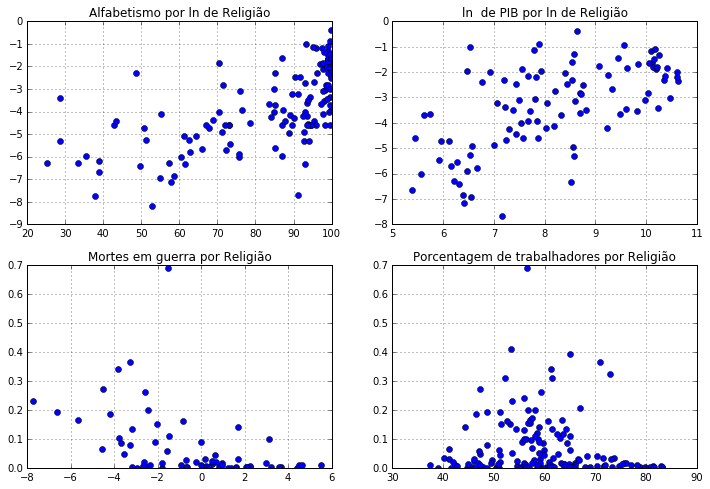

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.plot((ListaAA), np.log(ListaRA),"bo")
plt.title('Alfabetismo por ln de Religião')
plt.grid(True)

plt.subplot(222)
plt.plot((ListaPLog), np.log(ListaRP), "bo")
plt.title('ln  de PIB por ln de Religião')
plt.grid(True)

plt.subplot(223)
plt.plot(np.log(War2004["2004"]), TotalReligion2010["SemReligião"], "bo")
plt.title("Mortes em guerra por Religião")
plt.grid(True)

plt.subplot(224)
plt.plot( Work2007["2007"], TotalReligion2010["SemReligião"], "bo")
plt.title('Porcentagem de trabalhadores por Religião')
plt.grid(True)

plt.show()

### A partir dos dados observados chegamos a conclusao que as melhores variavesis para se análisar são o numero de pessoas sem religião em cada pais, a % de alfabetização das populações e o PIB dos paises, pois ambos, com a base (Numero de pessoas sem religião em %) em ln(x) , apresentam correlações consideraveis 0,63 e 0,61 respectivamente.

## Análise de Regressão

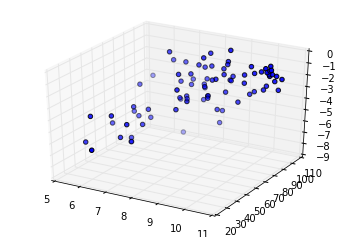

In [26]:
fig = plt.figure()
char = fig.add_subplot(1, 1, 1, projection='3d')

char.scatter(X, Y, Z)
plt.show()

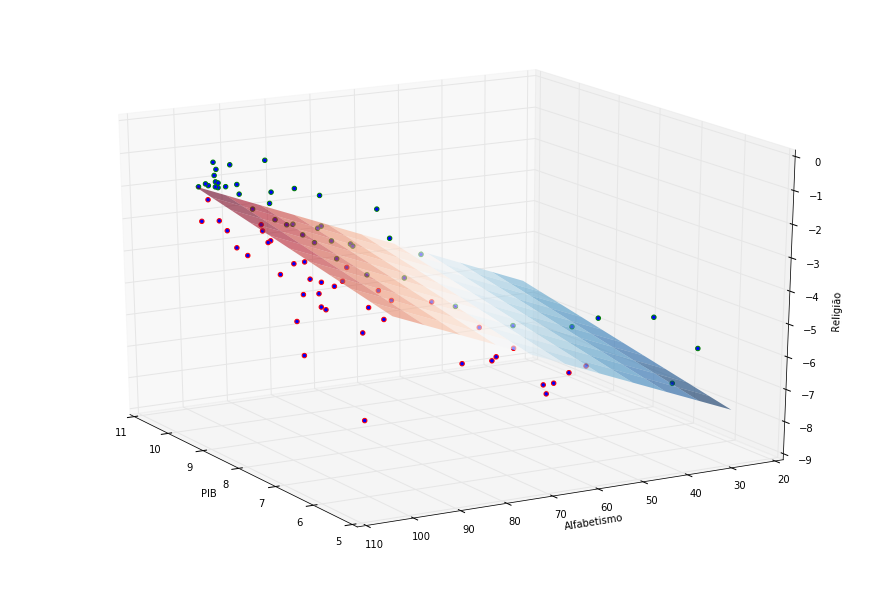

In [27]:
XYZ = pd.DataFrame()
XYZ["PIB"] = X
XYZ["Alfa"] = Y
XYZ["Reli"] = Z

x = XYZ[['PIB', 'Alfa']]
y = XYZ['Reli']

## fit a OLS model with intercept on TV and Radio
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(x.PIB.min(), x.PIB.max(), 100), 
                       np.linspace(x.Alfa.min(), x.Alfa.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(x)
ax.scatter(x[resid >= 0].PIB, x[resid >= 0].Alfa, y[resid >= 0], color='green', alpha=1.0, )
ax.scatter(x[resid < 0].PIB, x[resid < 0].Alfa, y[resid < 0], color='red', alpha=1.0)

# set axis labels
ax.view_init(elev=20, azim=150)
ax.set_xlabel('PIB')
ax.set_ylabel('Alfabetismo')
ax.set_zlabel('Religião')

O grafico Mostra a distribuição dos paises em torno dos três eixos e em relação ao "plano de regressão" sendo que os ponto azuis/verdes são os acima do plano e os vermelho/azuis os abaixo do plano.

In [28]:
data = pd.DataFrame({'PIB': X, 'Alfabetismo': Y, 'Religião': Z})

XX=sm.add_constant(data)
# Fit the model
model = ols("Religião ~ PIB + Alfabetismo", data)
fit = model.fit()
# Print the summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Religião   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 07 Dec 2016   Prob (F-statistic):           4.62e-15
Time:                        00:39:31   Log-Likelihood:                -130.72
No. Observations:                  84   AIC:                             267.4
Df Residuals:                      81   BIC:                             274.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -10.7647      0.762    -14.126      0.000       -12.281    -9.248
PIB             0.2881      0.120      2.402      0.019         0.049     0.527
Alfabetismo     0.0574      0.010      5.574      0.000         0.037     0.078
==============================================================================
Omnibus:                       12.091   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.107
Skew:                          -0.684   Prob(JB):                     0.000524
Kurtosis:                       4.564   Cond. No.                         537.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

A partir dos dados da função OLS temos os resultados de um teste Tstudent com nivel de significancia de 5% para verificar se a variavel é ou não relevante para os sistema.

Esse teste é feito com a hipotese nula e alternativas: 
H0  𝛽  = 0
H1  𝛽 != 0 

Ou seja se a variavel não for relevante o coeficiente que há multiplica para encontrar a resposta será nulo ou muito proximo de nulo, fazendo com que a hipotese nula seja aceita, caso contrario prevalece a alternativa.

Para o teste temos que t é dado por:

t = 𝛽 - 0 / raiz(σ^2 / Sxx)

σ^2 = SSe / n-2 

SSe = Σ(yi - ŷi)^2

No caso da regressão atual vemos que os valores encontrados pela função para a probabilidade de t estar na região critica são de 0.000 para o intercepto, 0.019 para o PIB e 0.000 para o Analfabetismo, todos menores do que nosso nivel de significancia.

Dessa forma é possivel concluir que todas as variaveis são relevantes para a regressão a nivel de significancia de 5%

---

Concluido que as variaveis são relevantes é necessário verificar se o modelo é adequado, a forma mais simples é observar o valor de R^2, sendo que quanto mais proximo de 1 melhor é o modelo, no caso o valor de 0.557 mostra que o modelo não é exelente mas cumpre sua função de estimar os valores.
Por outro lado pesquisas mostraram que esse metodo pode apresentar dados falsos, por isso o teste de White

In [29]:
y_hat = fit.predict(XX)

R2=(y-y_hat)**2

sm.stats.diagnostic.het_white(R2,XX)

(75.203829334674822,
 1.4404205267262081e-12,
 70.29679394344852,
 1.2286099780194212e-32)

Com o teste de white conseguimos ver que os valores p são menores que qualquer alpha reconhecido, dessa foram rejeitamos a hipotese nula, o que significa que o modelo não tem Heteroscedasticidade logo as variancias entre y e ŷ não são constantes

A partir disso concluimos que o modelo não é excelente mas ainda tem capacidade de realizar a previsão, infelizmente com um erro razoavel e  incinstante.

---

No modelo de regressão multipla teremos que:

PSR = 𝛽0 + 𝛽1 PIB + 𝛽2 ln IA + e

Onde PSR = porcentagem de pessoas sem religião, IA o indice de lfabetismo do pais, PIB o pib per capta do pais e "e" o erro esperado da regressão.

Como nosso mudelo utiliza a variavel resposta em ln e uma das variaveis descritivas em ln, para o indice de alfabetismo temos a situação log - lin, onde o log se refere a variavel resposta e lin se refere a variavel descritiva e para o Pib o caso log - log onde ambas descritiva e resposta estão submetidas a ln, dessa forma as estatisticas seguem as equações:

<img src = "./Imagens/Betas.png" width = 100 height = 70 align = left>
 
.

.

(log -log) ln(𝑦𝑖) = 𝛽c0 + 𝛽c1 ln(𝑥𝑖)

onde 𝛽c0 = 𝛽c0 e 𝛽c1 = %∆𝑦 / %∆𝑥

(log - lin) ln(𝑦𝑖) = 𝛽c0 + 𝛽c1 𝑥𝑖

onde 𝛽c0 = 𝛽c0 e 𝛽c1 = %∆𝑦 / 100∆𝑥

No caso desse projeto a função OSL do python já  fornece os valores de 𝛽0, 𝛽1 e 𝛽2 mais adequados para as series plotadas no gráfico acima, no caso do nosso sistema temos a função:

𝛽c0 = -10.764
𝛽c1 = 0.288
𝛽c2 = 0.0574

PSR = 0,288 PIB + 0.0574 Alfabetismo - 10.7647

A partir das fórmulas de (log - log) temos que o valor para interpretação de 𝛽c1 considerando o uso de logaritimo normal (ln) será de:

𝛽c1 = %∆𝑦 / %∆𝑥

E o de 𝛽c2 com a formula (log - lin) será de:

𝛽c2 = %∆𝑦 / 100∆𝑥

A partir disso, concluimos que B1 nos mostra que para cada variação de 1% do PIB teremos uma variação de 0.288% na porcentagem de não religiosos no Pais considerando que o resto se mantera constante
E que B2 nos mostra que para cada variação de 1% no indice de alfabetismo teremos uma variação de 5.74% na porcentagem de não religiosos no Pais considerando que o resto se mantera constante

Vale observar que no caso do B1 a porcentagem se refere a X% do PIB enquanto que em B2 a porcentagem é a unidade de mediada de alfabetismo, o 1% está relacionado ao incremento de 1 ao valor de alfabetismo.

---

O objetivo do nosso projeto era fazer um modelo de regressão que descrevia as relações de três variáveis. Nos foi pedido que essas variáveis fossem dados de vários países, e tivemos que pesquisar esses dados pela internet, para que assim fosse possível fazer a análise.
 As três variáveis foram: PIB, taxa de analfabetismo, e taxa de religião de cada pais.  Escolhemos essas variáveis pois achamos por intuição que elas podem conter alguma relação interessante. Antes havíamos também analisado outras variáveis, no caso: Mortes em conflito de guerra e taxa de emprego. Descartamos essas por que elas não apresentavam uma correlação boa umas com as outras.

----

### Tentativa de divisão em Continentes

In [30]:
Africa = ["Algeria","Angola","Benin","Botswana","Burkina","Burundi","Cameroon","Cape Verde","Central African Republic","Chad","Comoros","Congo","Congo"," Democratic Republic of","Djibouti","Egypt","Equatorial Guinea","Eritrea","Ethiopia","Gabon","Gambia","Ghana","Guinea","Guinea-Bissau","Ivory Coast","Kenya","Lesotho","Liberia","Libya","Madagascar","Malawi","Mali","Mauritania","Mauritius","Morocco","Mozambique","Namibia","Niger","Nigeria","Rwanda","Sao Tome and Principe","Senegal","Seychelles","Sierra Leone","Somalia","South Africa","South Sudan","Sudan","Swaziland","Tanzania","Togo","Tunisia","Uganda","Zambia","Zimbabwe"]
Asia = ["Afghanistan","Bahrain","Bangladesh","Bhutan","Brunei","Burma (Myanmar)","Cambodia","China","East Timor","India","Indonesia","Iran","Iraq","Israel","Japan","Jordan","Kazakhstan","Korea"," North","Korea"," South","Kuwait","Kyrgyzstan","Laos","Lebanon","Malaysia","Maldives","Mongolia","Nepal","Oman","Pakistan","Philippines","Qatar","Russian Federation","Saudi Arabia","Singapore","Sri Lanka","Syria","Tajikistan","Thailand","Turkey","Turkmenistan","United Arab Emirates","Uzbekistan","Vietnam","Yemen"]
Europa = ["Albania","Andorra","Armenia","Austria","Azerbaijan","Belarus","Belgium","Bosnia and Herzegovina","Bulgaria","Croatia","Cyprus","Czech Republic","Denmark","Estonia","Finland","France","Georgia","Germany","Greece","Hungary","Iceland","Ireland","Italy","Latvia","Liechtenstein","Lithuania","Luxembourg","Macedonia","Malta","Moldova","Monaco","Montenegro","Netherlands","Norway","Poland","Portugal","Romania","San Marino","Serbia","Slovakia","Slovenia","Spain","Sweden","Switzerland","Ukraine","United Kingdom","Vatican City"]
NAmeriaca = ["Antigua and Barbuda","Bahamas","Barbados","Belize","Canada","Costa Rica","Cuba","Dominica","Dominican Republic","El Salvador","Grenada","Guatemala","Haiti","Honduras","Jamaica","Mexico","Nicaragua","Panama","Saint Kitts and Nevis","Saint Lucia","Saint Vincent and the Grenadines","Trinidad and Tobago","United States"]
Oceania = ["Australia","Fiji","Kiribati","Marshall Islands","Micronesia","Nauru","New Zealand","Palau","Papua New Guinea","Samoa","Solomon Islands","Tonga","Tuvalu","Vanuatu"]
SAmerica = ["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","Guyana","Paraguay","Peru","Suriname","Uruguay","Venezuela"]

Continente = []
Pais = DIV["Pais"].tolist()


for i in range(len(Pais)):
    if Pais[i] in Africa:
        Continente.append("Africa")
    elif Pais[i] in Asia:
        Continente.append("Asia")
    elif Pais[i] in Europa:
        Continente.append("Europa")
    elif Pais[i] in NAmeriaca:
        Continente.append("NAmeriaca")
    elif Pais[i] in Oceania:
        Continente.append("Oceania")
    elif Pais[i] in SAmerica:
        Continente.append("SAmerica")
    else:
        Continente.append("Fail")
                          
DIV["Continente"] = Continente

DIVeuropa = DIV[DIV["Continente"]=="Europa"]
DIVafrica = DIV[DIV["Continente"]=="Africa"]
DIVasia = DIV[DIV["Continente"]=="Asia"]
DIVNAmerica = DIV[DIV["Continente"]=="NAmeriaca"]
DIVOceania = DIV[DIV["Continente"]=="Oceania"]
DIVSAmerica = DIV[DIV["Continente"]=="SAmerica"]

In [31]:
data = pd.DataFrame({'PIB': DIVafrica["X"], 'Alfabetismo': DIVafrica["Y"], 'Religião': DIVafrica["Z"]})

XX=sm.add_constant(data)
# Fit the model
model = ols("Religião ~ PIB + Alfabetismo", data)
fit = model.fit()
# Print the summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Religião   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     9.119
Date:                Wed, 07 Dec 2016   Prob (F-statistic):            0.00167
Time:                        00:39:31   Log-Likelihood:                -24.975
No. Observations:                  22   AIC:                             55.95
Df Residuals:                      19   BIC:                             59.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -8.6235      1.210     -7.127      0.000       -11.156    -6.091
PIB             0.2279      0.244      0.936      0.361        -0.282     0.738
Alfabetismo     0.0308      0.013      2.315      0.032         0.003     0.059
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   2.536
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.440
Skew:                           0.048   Prob(JB):                        0.802
Kurtosis:                       2.314   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
data = pd.DataFrame({'PIB': DIVasia["X"], 'Alfabetismo': DIVasia["Y"], 'Religião': DIVasia["Z"]})

XX=sm.add_constant(data)
# Fit the model
model = ols("Religião ~ PIB + Alfabetismo", data)
fit = model.fit()
# Print the summary
fit.summary()

C:\Users\Eduardo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Religião   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     2.975
Date:                Wed, 07 Dec 2016   Prob (F-statistic):             0.0927
Time:                        00:39:31   Log-Likelihood:                -27.086
No. Observations:                  14   AIC:                             60.17
Df Residuals:                      11   BIC:                             62.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -10.3745      3.848     -2.696      0.021       -18.844    -1.905
PIB            -0.2308      0.519     -0.445      0.665        -1.373     0.911
Alfabetismo     0.0869      0.037      2.362      0.038         0.006     0.168
==============================================================================
Omnibus:                        0.360   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.096
Skew:                          -0.177   Prob(JB):                        0.953
Kurtosis:                       2.802   Cond. No.                         673.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
data = pd.DataFrame({'PIB': DIVeuropa["X"], 'Alfabetismo': DIVeuropa["Y"], 'Religião': DIVeuropa["Z"]})

XX=sm.add_constant(data)
# Fit the model
model = ols("Religião ~ PIB + Alfabetismo", data)
fit = model.fit()
# Print the summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Religião   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     4.069
Date:                Wed, 07 Dec 2016   Prob (F-statistic):             0.0277
Time:                        00:39:31   Log-Likelihood:                -38.912
No. Observations:                  32   AIC:                             83.82
Df Residuals:                      29   BIC:                             88.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -30.3331     10.288     -2.948      0.006       -51.374    -9.292
PIB             0.1666      0.130      1.277      0.212        -0.100     0.433
Alfabetismo     0.2697      0.103      2.620      0.014         0.059     0.480
==============================================================================
Omnibus:                        0.964   Durbin-Watson:                   2.373
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.952
Skew:                          -0.264   Prob(JB):                        0.621
Kurtosis:                       2.340   Cond. No.                     6.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
data = pd.DataFrame({'PIB': DIVNAmerica["X"], 'Alfabetismo': DIVNAmerica["Y"], 'Religião': DIVNAmerica["Z"]})

XX=sm.add_constant(data)
# Fit the model
model = ols("Religião ~ PIB + Alfabetismo", data)
fit = model.fit()
# Print the summary
fit.summary()

C:\Users\Eduardo\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Religião   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                 -0.263
Method:                 Least Squares   F-statistic:                    0.4793
Date:                Wed, 07 Dec 2016   Prob (F-statistic):              0.660
Time:                        00:39:31   Log-Likelihood:                -4.8552
No. Observations:                   6   AIC:                             15.71
Df Residuals:                       3   BIC:                             15.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -5.7602      3.409     -1.690      0.190       -16.609     5.088
PIB            -0.0455      0.496     -0.092      0.933        -1.624     1.533
Alfabetismo     0.0395      0.055      0.721      0.523        -0.135     0.214
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.615
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.898
Skew:                          -1.356   Prob(JB):                        0.387
Kurtosis:                       3.489   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
data = pd.DataFrame({'PIB': DIVOceania["X"], 'Alfabetismo': DIVOceania["Y"], 'Religião': DIVOceania["Z"]})

XX=sm.add_constant(data)
# Fit the model
model = ols("Religião ~ PIB + Alfabetismo", data)
fit = model.fit()
# Print the summary
fit.summary()

C:\Users\Eduardo\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 1 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Religião   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 07 Dec 2016   Prob (F-statistic):                nan
Time:                        00:39:32   Log-Likelihood:                 33.932
No. Observations:                   1   AIC:                            -65.86
Df Residuals:                       0   BIC:                            -67.86
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.0001        inf         -0        nan           nan       nan
PIB            -0.0013        inf         -0        nan           nan       nan
Alfabetismo    -0.0121        inf         -0        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.375
Skew:                           0.000   Prob(JB):                        0.829
Kurtosis:                       0.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [36]:
data = pd.DataFrame({'PIB': DIVSAmerica["X"], 'Alfabetismo': DIVSAmerica["Y"], 'Religião': DIVSAmerica["Z"]})

XX=sm.add_constant(data)
# Fit the model
model = ols("Religião ~ PIB + Alfabetismo", data)
fit = model.fit()
# Print the summary
fit.summary()

C:\Users\Eduardo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Religião   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                 -0.075
Method:                 Least Squares   F-statistic:                    0.7556
Date:                Wed, 07 Dec 2016   Prob (F-statistic):              0.517
Time:                        00:39:32   Log-Likelihood:                -6.5957
No. Observations:                   8   AIC:                             19.19
Df Residuals:                       5   BIC:                             19.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -4.5462      7.616     -0.597      0.577       -24.125    15.033
PIB             0.5026      0.450      1.118      0.314        -0.653     1.659
Alfabetismo    -0.0268      0.099     -0.270      0.798        -0.281     0.228
==============================================================================
Omnibus:                        3.682   Durbin-Watson:                   2.619
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                0.962
Skew:                          -0.837   Prob(JB):                        0.618
Kurtosis:                       3.283   Cond. No.                     2.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir dos dados é evidente que para grupos menores o modelo não funciona, em parte porque o numero pequeno de paises com dados (85) não permite divisões muito abranjentes, como exemplo a continetal que deixa continentes como oceania com a penas 1 pais. 

Além disso mesmo os grupos que tinham paises suficientes (ainda muito poucos) apresentaram um R^2 muti baixo para posssibilitar confiança no modelo e valores de T para o teste de significancia da variavel no modelo muito altos, o que invalida as variaveis do modelo.

---

## Conclusão

A partir do projeto percebemos que existe uma correlação entre a porcentagem de pessoas sem religão em um país e o indice de analfabetismo do pais, percebemos também que essa relação ocorre para o PIB per capta. Além disso concluimos que linearizar (com ln) dados pode ajudar muito a chegar em correlações mais fortes entre as variaveis.

A partir desse ponto vimos que fortes correlações levam a regressões lineares mais fortes, e que quando se lineariza as variaveis o impacto no signifacado dos coeficientes das equações não é tão drastico e pode ser previsto.

Vale destacar que o numero de Países que estão sendo avaliados na regressão é de muitissima importancia para a qualidade da regressão sendo que quanto mais países melhor a regressão, isso pode ser visto pela tentativa de subdividir os paises em continentes que resultou em uma serie de regressões falhas.

Uma observação importante é que para a associação de variaveis ser possivel, não so ambas precisam da mesma variavel resposta linearizada (se alfabetismo está em função de ln de religião Mortes em guerra não está não pode ser trabalhada junto a alfabetismo) como ambas precisam conter os mesmos paises.

No nosso projeto esse ultimo fator foi muito influente pois apenas 43 paises se encontravam em todas as variaveis análisadas (religião, alfabetismo, PIB per capta) o que nos obrigou a completar alguns dados com valores de fontes que não apenas as databases de um ano, como utilizar dados de 2011 e 2010 em conjunto para a database de Alfabetismo e sites como a unesco para completar alguns dados de paises relevantes, o que nos levou a 84 paises com todas as variaveis disponiveis.

Por fim vale destacar que apesar de a regressão não ser muito exata, ela ainda cumpriu o objetivo de modelar a porcentagem de pessoas sem religião no pais em função do pib per capta e do alfabetismo com um precisão media de +- 3%, o que parece bastante aceitavel considerando o baixo numero de paises (85) que fazem parte da regressão.